<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [2]:
!pip install numpy pandas seaborn scikit-learn

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [ ]:
#from js import fetch
#import io

#URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(text1)

In [ ]:
#data.head()

In [ ]:
#URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
#X = pd.read_csv(text2)

In [ ]:
#X.head(100)

In [5]:
# 1. Load CSV file directly from the web
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL1)

print("Original DataFrame:")
print(df.head())
print(df.info())

Original DataFrame:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577

In [6]:
# 2. Separate target variable and features
y = df['Class']          # Zielvariable
X = df.drop('Class', axis=1)  # Alle Features außer 'Class'

print("Zielvariable y (erste 5 Werte):")
print(y.head())
print("\nKlassenverteilung in y:")
print(y.value_counts())

print("\nFeatures X (erste 5 Zeilen, vor Encoding):")
print(X.head())

Zielvariable y (erste 5 Werte):
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Klassenverteilung in y:
Class
1    60
0    30
Name: count, dtype: int64

Features X (erste 5 Zeilen, vor Encoding):
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False  

In [7]:
# 3. Optional: Convert non-numeric columns (e.g., one-hot encoding)
# If necessary, e.g. for ‘BoosterVersion’ or 'LaunchSite'
X = pd.get_dummies(X)

print("Features X nach One-Hot-Encoding (erste 5 Zeilen):")
print(X.head())
print("\nFeature-Spalten nach Encoding:")
print(X.columns)

Features X nach One-Hot-Encoding (erste 5 Zeilen):
   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount   Longitude   Latitude  ...  Serial_B1048  Serial_B1049  \
0            0  -80.577366  28.561857  ...         False         False   
1            0  -80.577366  28.561857  ...         False         False   
2            0  -80.577366  28.561857  ...         False         False   
3            0 -120.610829  34.632093  ...         False         False   
4            0  -80.577366  28.561857  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial

In [8]:
# 4. Split train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train-Test-Split Größen:\nX_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Train-Test-Split Größen:
X_train: (72, 181), X_test: (18, 181)
y_train: (72,), y_test: (18,)


In [9]:
# 5. Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Beispiel für standardisierte Features (erste 5 Zeilen):")
print(X_train_scaled[:5])

Beispiel für standardisierte Features (erste 5 Zeilen):
[[ 0.11466551 -0.56447785 -0.66532184  0.55595945 -0.84515425  0.53452248
   0.89895941  0.76213989  0.42328803 -0.40899758  0.         -0.11867817
  -0.11867817 -0.11867817  0.         -0.11867817 -0.11867817 -0.11867817
  -0.11867817 -0.11867817  0.         -0.11867817  0.         -0.11867817
  -0.11867817 -0.11867817 -0.11867817 -0.11867817  0.         -0.11867817
  -0.11867817 -0.11867817  0.         -0.11867817 -0.11867817 -0.11867817
   0.         -0.11867817  0.         -0.11867817 -0.11867817 -0.11867817
  -0.11867817 -0.11867817 -0.11867817  0.         -0.11867817 -0.11867817
  -0.11867817  0.          0.         -0.11867817 -0.11867817 -0.11867817
   0.         -0.11867817 -0.11867817 -0.11867817 -0.11867817  8.42614977
  -0.11867817 -0.11867817 -0.11867817 -0.11867817 -0.11867817  0.
   0.         -0.11867817 -0.11867817 -0.11867817 -0.11867817 -0.11867817
  -0.11867817 -0.11867817 -0.11867817  0.         -0.11867817 -0

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
# Y as a NumPy array from the ‘Class’ column
Y = df['Class'].to_numpy()

# Check data
print(type(Y))       # <class 'numpy.ndarray'>
print(Y.shape)       # (Number of lines,)
print(Y[:10])         # first 10 values

<class 'numpy.ndarray'>
(90,)
[0 0 0 0 0 0 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Example: X your feature data frame
# Create transform object (StandardScaler)
transform = preprocessing.StandardScaler()

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and Transform on Training Data
X_train_scaled = transform.fit_transform(X_train)

# Transform to test data
X_test_scaled = transform.transform(X_test)

# Optional: Save the standardized data back to X, then:
# (For example, only the training data, depending on the use case)
X_train = X_train_scaled
X_test = X_test_scaled

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (72, 181)
X_test shape: (18, 181)
y_train shape: (72,)
y_test shape: (18,)


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [14]:
# Var. 1

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg_cv', GridSearchCV(
        LogisticRegression(max_iter=1000),
        param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']},
        cv=10
    ))
])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg_cv',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(max_iter=1000),
                              param_grid={'C': [0.01, 0.1, 1],
                                          'penalty': ['l2'],
                                          'solver': ['lbfgs']}))])

In [18]:
# Output of the best parameters and best accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# Display value as a percentage
accuracy_percent = logreg_cv.best_score_ * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

tuned hpyerparameters :(best parameters)  {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
accuracy : 0.9160714285714286
Accuracy: 91.61%


In [16]:
# Var. 2

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Pipeline with Scaler and LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Parameters for GridSearchCV - prefix corresponds to step name in pipeline
parameters = {
    'logreg__C': [0.01, 0.1, 1],
    'logreg__penalty': ['l2'],  # Korrekt: l2, nicht 12
    'logreg__solver': ['lbfgs']
}

# GridSearchCV with pipeline as model
logreg_cv = GridSearchCV(pipe, param_grid=parameters, cv=10)

# Train model
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logreg__C': [0.01, 0.1, 1], 'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [17]:
# Output of the best parameters and best accuracy
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# Display value as a percentage
accuracy_percent = logreg_cv.best_score_ * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

tuned hpyerparameters :(best parameters)  {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
accuracy : 0.9160714285714286
Accuracy: 91.61%


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
# Calculate the accuracy on the test data

parameters = {
    'logreg__C': [0.01, 0.1, 1],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs']
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

logreg_cv = GridSearchCV(pipe, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

# Task 5: Accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Percentage of expenditure
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 94.44%


Lets look at the confusion matrix:


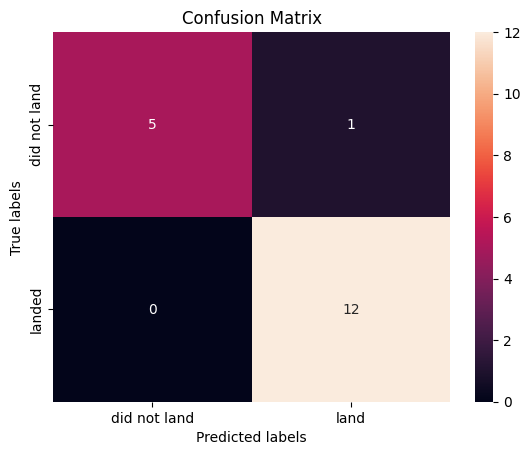

In [20]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Parameter dictionary
parameters = {
    'kernel': ['linear', 'rbf'],          # kleineres Raster
    'C': [0.1, 1, 10],                    # weniger Werte
    'gamma': ['scale', 'auto']            # weniger Werte
}

# SVM model
svm = SVC()

# GridSearchCV with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, n_jobs=-1)  # cv=5 und n_jobs=-1 für parallele Berechnung

# model training
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [44]:
# Output of the best parameters and accuracy
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)

print(f"Accuracy: {svm_cv.best_score_:.2%}")

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 87.52%


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
# Calculate the accuracy of the best SVM model on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Output result
print(f"SVM Test Accuracy: {svm_test_accuracy:.2%}")

SVM Test Accuracy: 94.44%


We can plot the confusion matrix


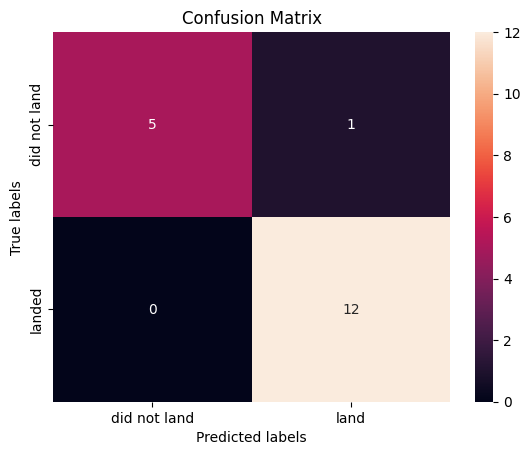

In [25]:
# Predictions for test data
yhat=svm_cv.predict(X_test)

# Konfusionsmatrix plotten
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 1. parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    #'max_depth': [2*n for n in range(1, 10)],
    'max_depth': [4, 6, 8, 10, 12],
    #'max_features': ['auto', 'sqrt', None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# 2. Decision tree object
tree = DecisionTreeClassifier(random_state=42)

# 3. GridSearchCV with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, n_jobs=-1)

# 4. Train model
tree_cv.fit(X_train, Y_train)

# 5. Output best parameters and accuracy
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)

# Output best parameters and training accuracy
print(f"Training Accuracy (cross-validated): {tree_cv.best_score_:.2%}")

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Training Accuracy (cross-validated): 93.21%


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [39]:
# Calculate accuracy based on test data
test_accuracy = tree_cv.score(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 94.44%


We can plot the confusion matrix


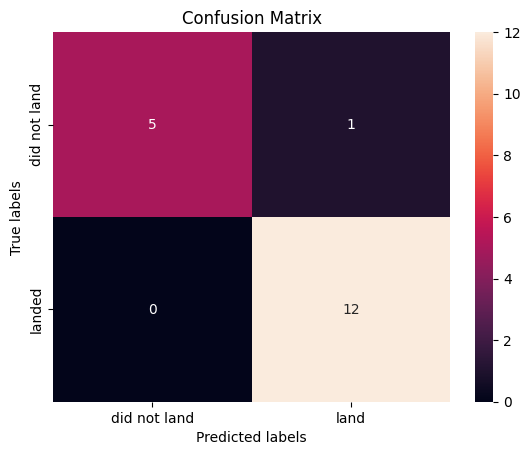

In [31]:
# Display confusion matrix
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

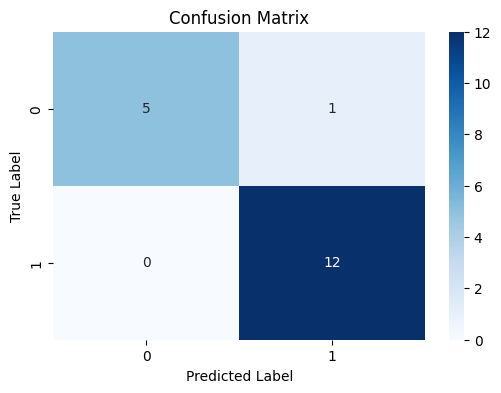

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# forecasts
yhat = tree_cv.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, yhat)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create KNN object
KNN = KNeighborsClassifier()

# Create GridSearchCV with cv=10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, n_jobs=-1)

# Fit GridSearchCV (with training data)
knn_cv.fit(X_train, Y_train)

# Output best parameters and best accuracy
print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)

# Output best parameters and best accuracy
print(f"Accuracy: {knn_cv.best_score_:.2%}")

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Accuracy: 66.43%


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Test Accuracy (KNN): 61.11%


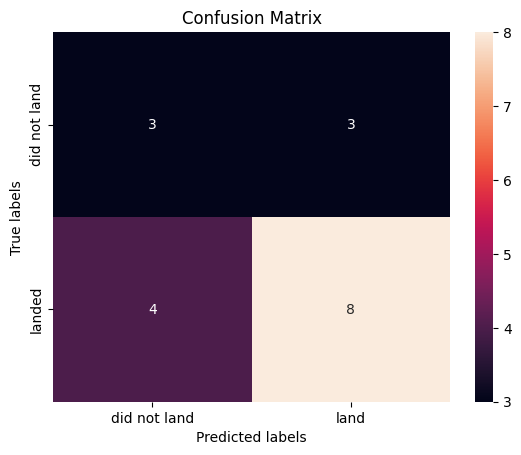

In [45]:
# Calculate the test accuracy
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print(f"Test Accuracy (KNN): {test_accuracy_knn:.2%}")

# We can plot the confusion matrix
# Generate predictions
yhat = knn_cv.predict(X_test)

# Display confusion matrix
plot_confusion_matrix(Y_test, yhat)

## TASK  12


Find the method performs best:


Conclusion: Decision Tree wins

•    Higher accuracy on test data

•    Fewer misclassifications according to the confusion matrix

•    Better generalization on this data set (at least according to the current measurements)


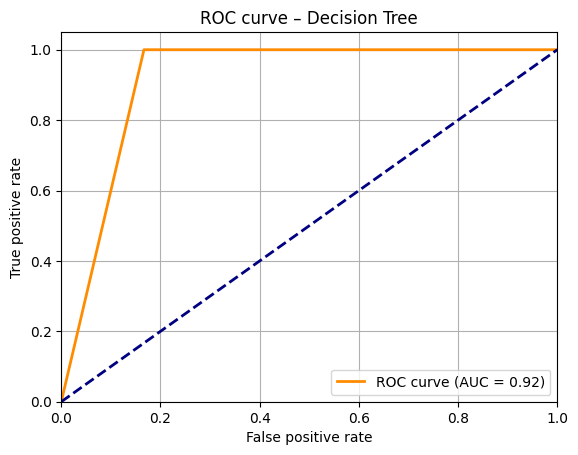

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilities for the positive class 
y_proba = tree_cv.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

# plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve – Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [53]:
# Graded Quiz: Predictive Analysis
# Question 1: How many records were there in the test sample?

from sklearn.model_selection import train_test_split

# Assuming X and Y are already defined and contain your features and target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Distribution of the number of test samples
print("Anzahl der Test-Samples:", len(Y_test))

Anzahl der Test-Samples: 18


In [54]:
# Graded Quiz: Predictive Analysis
# Question 3: After selecting the best hyperparameters for the decision tree classifier using the validation data, what was the accuracy achieved on the test data?
# Genauigkeit auf den Testdaten berechnen
test_accuracy = tree_cv.score(X_test, Y_test)

print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 94.44%


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
